In [146]:
#Cargar las librerias necesarias

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objs as go 
import plotly.express as px 

# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [5]:
img = mpimg.imread('E:/Escritorio/Analisis_de_Datos/Tarea_4/unad_imagen.png')

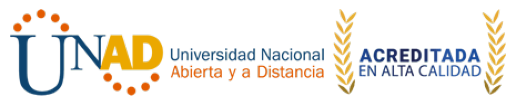

In [7]:
# Muestra la imagen
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()


<div style="text-align: center;">
    <h1> Análisis de Datos </h1>
 <h2> Grupo: 83</h2>
 <h2>Tarea 5 Proyecto Análisis de Datos</h2>
 <h2>Presentado por: William David Arias Amaya</h2>
 <h2>Código: 1070970618 </h2>
 <h2>Tutor: Sandra M. Patiño </h2>
 <h2>UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD</h2>
 <h2>Diciembre de 2024</h2>
</div> <br>




### Pasos de la Actividad
### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
### 5. Entrenar el modelo configurando los diferentes hiperparámetros.
### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
### 8. Interpretar, analizar y documentar los resultados obtenidos
### • Cargar en GitHub el código del modelo diseñado https://github.com/



In [44]:
#Cargamos el dataset con vista de filas
data = pd.read_csv("E:/Escritorio/Analisis_de_Datos/taller_final/Titanic-Dataset.csv")
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [46]:
data.shape


(891, 12)

In [48]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## En esta tabla podremos encontrar que:
### PassengerId: Identificador único del pasajero:
### count: Hay 891 pasajeros en total.
### mean: El valor promedio del identificador es 446.
### std: La desviación estándar (que mide la dispersión de los valores) es 257.35, lo que indica que los identificadores están bastante dispersos.
### min: El identificador más bajo es 1.
### max: El identificador más alto es 891.

## Survived: Si el pasajero sobrevivió (1) o no (0).
### count: 891 pasajeros con datos disponibles.
### mean: El 38.38% de los pasajeros sobrevivieron (ya que la media es 0.38).
### std: La desviación estándar es 0.49, lo que sugiere una distribución algo equilibrada entre los que sobrevivieron y los que no.
### min: No hubo pasajeros que sobrevivieran con un valor de -1, el mínimo es 0 (no sobrevivió).
### max: El máximo valor es 1, es decir, algunos sobrevivieron.

## Pclass: Clase del pasajero (1, 2 o 3).
### count: Todos los pasajeros tienen un valor en esta columna.
### mean: La media es 2.31, lo que indica que la mayoría de los pasajeros eran de clase 2 o 3.
### std: La desviación estándar es 0.84, lo que refleja que hay una distribución relativamente equilibrada entre las clases.
### min: El valor más bajo es 1 (clase 1).
### max: El valor más alto es 3 (clase 3).

## Age: Edad del pasajero.
### count: Hay datos de edad para 714 pasajeros.
### mean: La edad media es de aproximadamente 29.7 años.
### std: La desviación estándar es 14.53, lo que sugiere una distribución de edades bastante amplia.
### min: La edad mínima es 0.42 años (probablemente un bebé).
### max: La edad máxima es 80 años.

## SibSp: Número de hermanos y cónyuges a bordo con el pasajero.
### count: Todos los pasajeros tienen un valor en esta columna.
### mean: En promedio, cada pasajero tenía 0.52 hermanos o cónyuges a bordo.
### std: La desviación estándar es 1.10, lo que indica que algunos pasajeros tenían varios familiares a bordo.
### min: Algunos pasajeros no tenían familiares a bordo (0).
### max: El máximo número de hermanos o cónyuges a bordo fue 8.

## Parch: Número de padres o hijos a bordo con el pasajero.
### count: Todos los pasajeros tienen un valor en esta columna.
### mean: En promedio, cada pasajero tenía 0.38 padres o hijos a bordo.
### std: La desviación estándar es 0.81, lo que indica cierta dispersión en los valores.
### min: Algunos pasajeros no tenían padres ni hijos a bordo (0).
### max: El máximo número de padres o hijos a bordo fue 6.

## Fare: Tarifa pagada por el pasajero.
### count: Todos los pasajeros tienen un valor en esta columna.
### mean: La tarifa promedio es de 32.2.
### std: La desviación estándar es 49.69, lo que indica una gran variabilidad en las tarifas pagadas.
### min: La tarifa mínima es 0 (probablemente un error o un caso especial).
### max: La tarifa máxima es 512.33, que corresponde a un pasajero que pagó una tarifa considerablemente más alta.


In [51]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

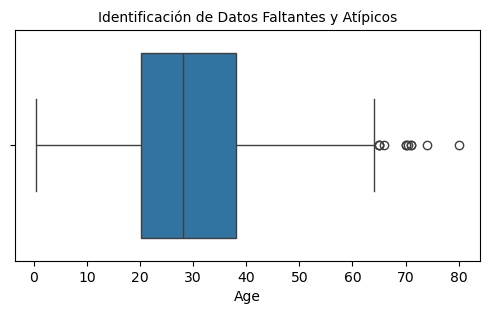

In [53]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
### Identificar datos Faltantes

In [150]:
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Rellenar valores faltantes en 'Age' con la media
data['Fare'].fillna(data['Fare'].mean(), inplace=True)  # Rellenar valores faltantes en 'Fare'

In [152]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


In [154]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

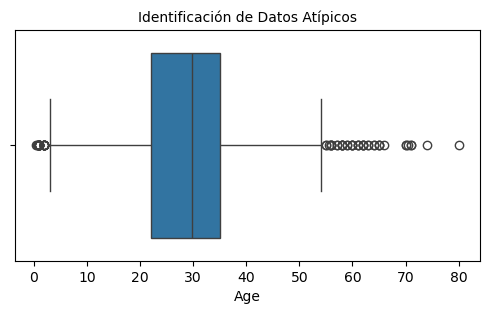

In [156]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [162]:
le = LabelEncoder()  # Crear una instancia de LabelEncoder
data['Sex'] = le.fit_transform(data['Sex'])

In [166]:
# Codificar la columna 'Embarked' usando One-Hot Encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [62]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [68]:
# Filtra Datos Atípicos

Datos=data[(data['Age']<nivel_maximo)&(data['Age']>nivel_minimo)]

In [70]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [172]:
# Filtrar columnas del modelo 

Datos1 = Datos[["PassengerId","Age", "Survived"]]

In [75]:
# Revisión de los datos de las variables objetivo
Datos1.head(50)

,PassengerId,Name,Age,Survived
0,1,"Braund, Mr. Owen Harris",22.0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,3,"Heikkinen, Miss. Laina",26.0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,5,"Allen, Mr. William Henry",35.0,0
6,7,"McCarthy, Mr. Timothy J",54.0,0
7,8,"Palsson, Master. Gosta Leonard",2.0,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1
10,11,"Sandstrom, Miss. Marguerite Rut",4.0,1


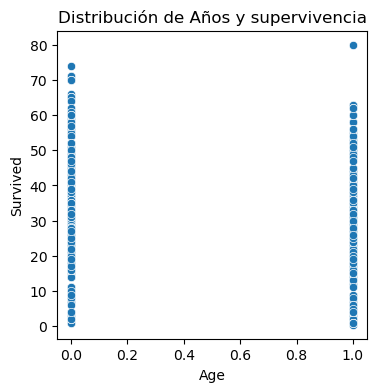

In [174]:
# Grafica antes del agrupamiento

plt.figure(figsize=(4, 4))
sns.scatterplot(x=Datos1['Survived'], y=Datos1['Age'])
plt.title('Distribución de Años y supervivencia')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [214]:
# Paso 1: Preprocesamiento


# Rellenar los valores faltantes
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Rellenar 'Age' con la media


# Codificar la columna 'Sex' (hombre = 1, mujer = 0)
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])


# Paso 2: Definir las características (X) y la variable objetivo (y)
X = data.drop('Survived', axis=1)  # Eliminar la columna objetivo 'Survived' de las características
y = data['Survived']  # La columna 'Survived' es la variable objetivo

# Paso 3: Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (712, 10)
Forma de X_test: (179, 10)
Forma de y_train: (712,)
Forma de y_test: (179,)


In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo
tree_clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_clf.predict(X_test)

# Evaluar el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión: 0.7597765363128491
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

## Entrenando un Árbol de Decisión con hiperparámetros
### Los hiperparámetros importantes de un Árbol de Decisión incluyen max_depth (la profundidad máxima del árbol), min_samples_split (el número mínimo de muestras necesarias para dividir un nodo) y criterion (criterio de división, como "gini" o "entropy")..

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Paso 1: Crear el modelo de Árbol de Decisión con hiperparámetros configurados
tree_clf = DecisionTreeClassifier(
    random_state=42,        # Para obtener resultados reproducibles
    max_depth=5,            # Establecer la profundidad máxima del árbol
    min_samples_split=10,   # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=5,     # Mínimo número de muestras en una hoja
    max_features='sqrt'     # Considerar todas las características al hacer la división
)

# Paso 2: Entrenar el modelo con los datos de entrenamiento
tree_clf.fit(X_train, y_train)

# Paso 3: Realizar predicciones sobre los datos de prueba
y_pred = tree_clf.predict(X_test)

# Paso 4: Evaluar el rendimiento del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión: 0.8044692737430168
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



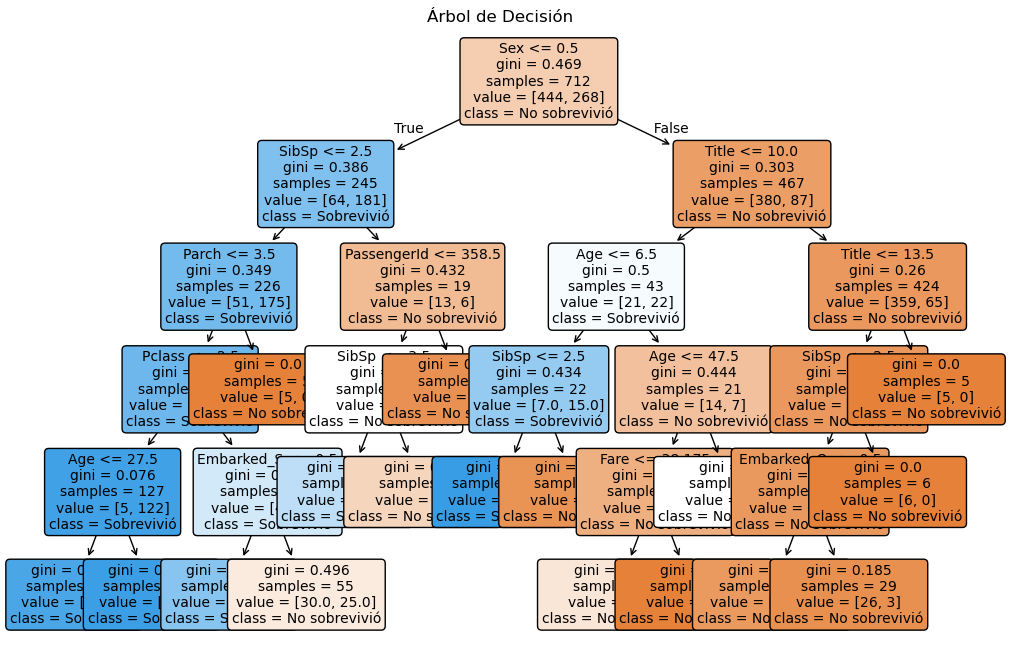

In [252]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))  # Tamaño de la imagen
plot_tree(tree_clf, 
          feature_names=X_train.columns,  # Nombres de las características
          class_names=['No sobrevivió', 'Sobrevivió'],  # Clases de la variable objetivo
          filled=True,  # Colorear los nodos para mayor claridad
          rounded=True,  # Bordes redondeados para los nodos
          fontsize=10)  # Tamaño de la fuente
plt.title("Árbol de Decisión")
plt.show()

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [257]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Precisión: 0.8045
Recall: 0.6486
F1-Score: 0.7328

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



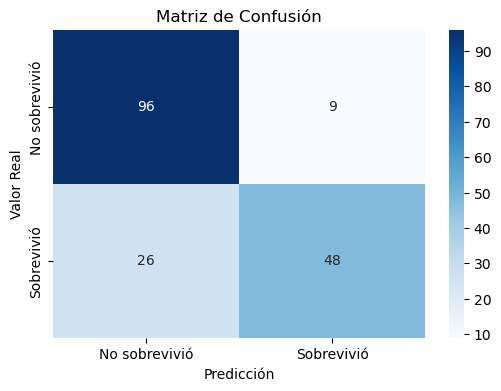

In [259]:
y_pred = tree_clf.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar los resultados
print(f"Precisión: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando un heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

### Matriz de confusión

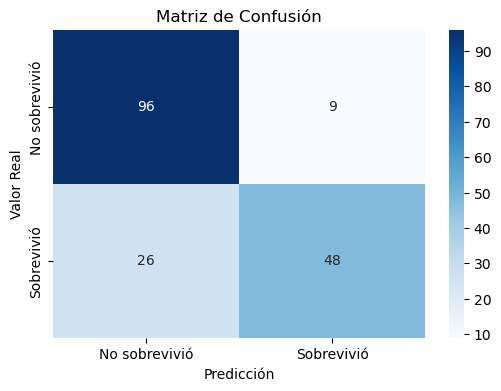

In [264]:
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

## Curva ROC (Receiver Operating Characteristic)

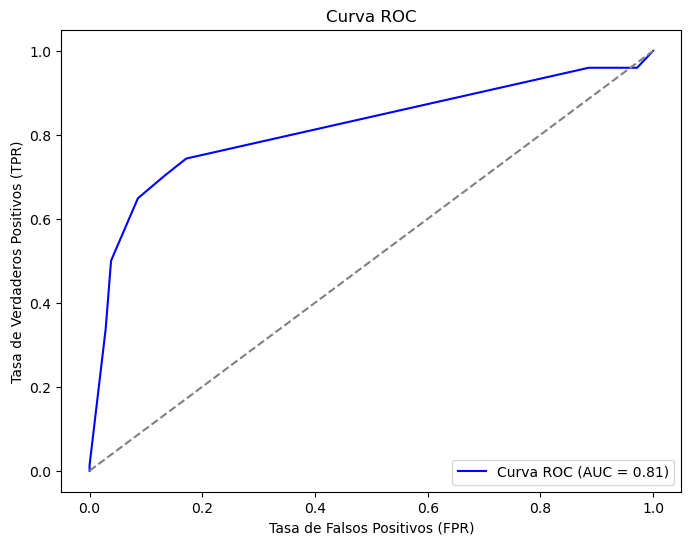

In [268]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de las predicciones
y_prob = tree_clf.predict_proba(X_test)[:, 1]  # Obtener las probabilidades para la clase positiva

# Calcular los valores de FPR y TPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (modelo aleatorio)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Curva de Precisión-Recall

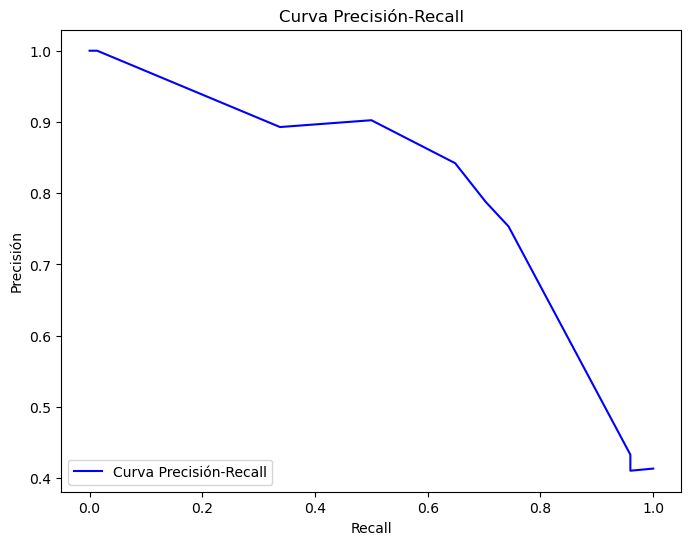

In [271]:
from sklearn.metrics import precision_recall_curve

# Calcular las precisiones y recalls para diferentes umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Graficar la curva de Precisión-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Curva Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend(loc='lower left')
plt.show()

## Importancia de las Características

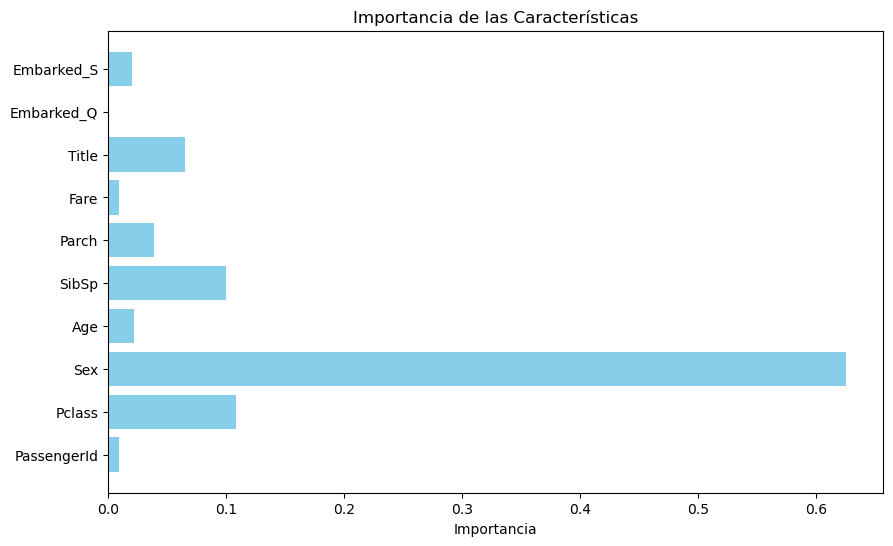

In [274]:
feature_importances = tree_clf.feature_importances_

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

## El dataset Titanic es un conjunto de datos clásico utilizado para predecir si un pasajero sobrevivió o no al desastre del Titanic en función de diversas características. En este análisis, se realiza una exploración general de las características del dataset y se presentan las observaciones clave que pueden ser relevantes para entender el comportamiento del modelo de clasificación basado en un Árbol de Decisión, este dataset contiene varias columnas que describen diferentes atributos de los pasajeros. Estas columnas incluyen tanto variables numéricas como categóricas, y es importante entender cómo cada una contribuye al resultado final.
## Una de las observaciones clave es la cantidad de valores faltantes en varias columnas, especialmente en las variables Age y Cabin. La variable Cabin tiene una gran cantidad de valores nulos, lo que sugiere que la información sobre la cabina no estaba completamente disponible o no se registraba de manera consistente. Esta columna podría ser descartada si no se puede imputar la información de manera efectiva, ya que su impacto en el modelo sería limitado debido a la falta de datos. En cuanto a Age, la ausencia de valores puede ser un desafío, pero hay técnicas disponibles para imputar la edad, como el uso de la mediana de la edad por clase o género. Es importante considerar la forma en que se manejarán estos valores faltantes para no introducir sesgos en el modelo.

### Distribución de Clases:
## La variable Survived es una variable binaria que indica si el pasajero sobrevivió o no. La distribución de los valores en Survived muestra que el número de muertos es significativamente mayor que el número de sobrevivientes, lo que hace que el conjunto de datos esté desbalanceado. Este desbalance podría afectar el rendimiento de los modelos de clasificación, por lo que es importante aplicar técnicas de ajuste de clases como muestreo balanceado, ponderación de clases o el uso de métricas de evaluación específicas, como el F1-Score, que es más adecuado para problemas con clases desbalanceadas.

## Correlaciones y Relaciones entre Variables:
### Al observar las correlaciones entre las variables, es importante destacar que Fare y Pclass están correlacionadas, lo que tiene sentido, ya que los pasajeros en clases superiores pagaron tarifas más altas. Asimismo, Age y Survived pueden mostrar una relación positiva para los pasajeros más jóvenes, lo que refleja que los niños y adolescentes tienen una mayor probabilidad de haber sobrevivido. Es posible que las variables Sex y Survived muestren una fuerte relación, ya que las mujeres tuvieron más probabilidades de sobrevivir que los hombres, debido a las normas sociales de la época. Esta relación puede ser significativa al construir el modelo.

## Modelado y Resultados:

### Cuando se entrena un modelo de clasificación, como un Árbol de Decisión, es fundamental revisar las métricas de desempeño. Estas métricas incluyen la precisión, el recall, el F1-Score, y el AUC de la curva ROC, que nos indican qué tan bien el modelo está clasificando a los pasajeros en función de sus características. El Árbol de Decisión es un modelo interpretable, y su capacidad para dividir los datos según las características más relevantes puede proporcionarnos una idea clara de qué factores influyen más en la supervivencia. Al analizar la importancia de las características, podemos ver si variables como Sexo, Clase del boleto, Edad y Fare son las más relevantes para la predicción.

### Conclusión:

## El dataset Titanic es un conjunto de datos rico y complejo con características que influyen directamente en la probabilidad de supervivencia de un pasajero. Aunque algunas columnas tienen valores faltantes y otras presentan una distribución desbalanceada de las clases, es posible abordar estos problemas mediante técnicas de preprocesamiento adecuadas, como la imputación de valores y el ajuste del modelo para manejar el desbalance de clases, el análisis de las métricas de desempeño y las visualizaciones proporcionadas nos ayuda a comprender mejor cómo el modelo de clasificación toma sus decisiones, y qué características tienen un impacto significativo en la predicción. El Árbol de Decisión puede ser un modelo útil, este análisis ayuda a preparar el terreno para realizar mejoras en el modelo, probar otros algoritmos y, en general, obtener una comprensión más profunda de cómo las características del dataset afectan la supervivencia de los pasajeros del Titanic.